In [144]:
import pandas as pd # To handle the data set.
import seaborn as sns # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np

from sklearn.model_selection import train_test_split # To split data
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.decomposition import PCA # To apply PCA
from sklearn import preprocessing # To get MinMax Scaler function

# To plot inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [145]:
heart=pd.read_csv("C:/Users/Manpreet.Kaur/Desktop/datasets/heartcsv/Heart.csv")

In [146]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [147]:
heart.shape

(303, 15)

In [148]:
heart.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [149]:
heart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

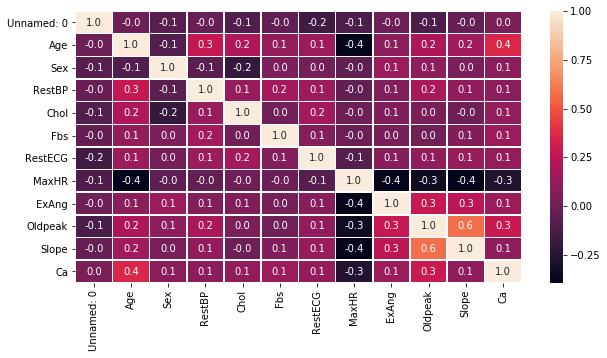

In [150]:
# correlation map
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heart.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

In [151]:
heart.dropna(inplace = True)

In [152]:
heart=heart.drop(['Unnamed: 0'], axis=1)

In [153]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [154]:
heart['AHD'].replace({'No':0,'Yes':1},inplace = True)

In [155]:
heart.shape

(297, 14)

In [156]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [157]:
categorical = ['ChestPain','Thal']

In [158]:
categorical

['ChestPain', 'Thal']

In [159]:
hrt = pd.get_dummies(heart,columns = categorical,drop_first=True)

In [160]:
hrt.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,1,0


In [161]:
hrt.shape

(297, 17)

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
sc = StandardScaler()

In [164]:
x = hrt.drop(labels = ['AHD'],axis = 1)

In [165]:
x.shape

(297, 16)

In [166]:
y = hrt['AHD']

In [167]:
x = sc.fit_transform(x)

In [168]:
x

array([[ 0.93618065,  0.69109474,  0.75038004, ...,  3.4515277 ,
        -1.11044257, -0.79490133],
       [ 1.3789285 ,  0.69109474,  1.59626645, ..., -0.28972678,
         0.90054184, -0.79490133],
       [ 1.3789285 ,  0.69109474, -0.65943064, ..., -0.28972678,
        -1.11044257,  1.25801776],
       ...,
       [ 1.48961547,  0.69109474,  0.69398761, ..., -0.28972678,
        -1.11044257,  1.25801776],
       [ 0.27205887,  0.69109474, -0.09550637, ..., -0.28972678,
        -1.11044257,  1.25801776],
       [ 0.27205887, -1.44697961, -0.09550637, ..., -0.28972678,
         0.90054184, -0.79490133]])

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [170]:
rc = RandomForestClassifier(n_estimators = 200,max_leaf_nodes = 1000)
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
y_pred = rc.predict(x_test)
y_train_pred = rc.predict(x_train)

In [172]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [173]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       106

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [174]:
confusion_matrix(y_train,y_train_pred)

array([[131,   0],
       [  0, 106]], dtype=int64)

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.77      0.80        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [176]:
print(confusion_matrix(y_test,y_pred))

[[24  5]
 [ 7 24]]


In [177]:
print('Training accuracy = ',accuracy_score(y_train,y_train_pred))
print('Testing accuracy = ',accuracy_score(y_test,y_pred))

Training accuracy =  1.0
Testing accuracy =  0.8


In [178]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

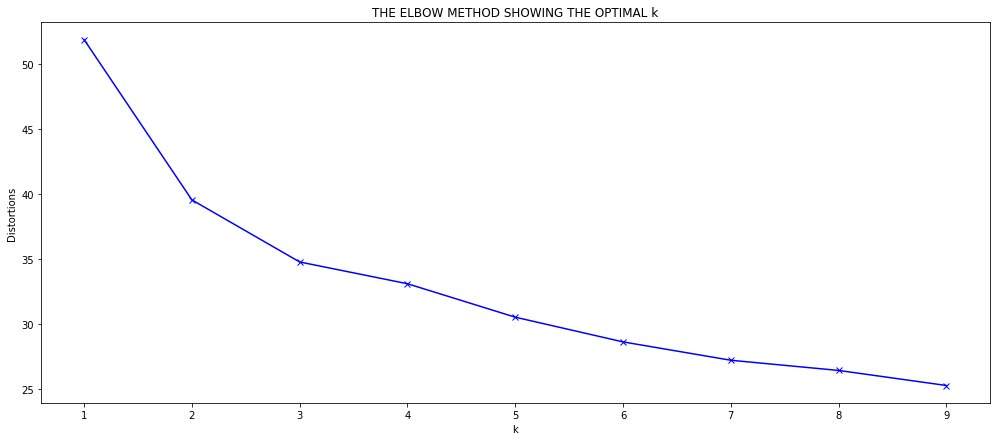

In [179]:
X=np.array(hrt)
#it means determine
distortions=[]
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

fig=plt.figure(figsize=(17,7))
plt.plot(K,distortions,'bx-',color='blue')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('THE ELBOW METHOD SHOWING THE OPTIMAL k')
plt.show()

In [180]:
def bino_all(df, DROP,rs,test_size,dtmd,rfne,knnnn,abne):
    import numpy as np
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import auc, roc_curve
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    dfd=pd.get_dummies(df.drop(DROP,axis=1))
    dfd[DROP]=df[DROP]
    train, test = train_test_split(dfd,test_size=test_size,random_state=rs)
    train_x = train.drop(DROP, axis=1)
    train_y = train[DROP]
    test_x = test.drop(DROP, axis=1)
    test_y = test[DROP]
    l=[]
#     l1=[]
#     l2=[]
    model_1aa=DecisionTreeClassifier(max_depth=dtmd)
    model_2aa=RandomForestClassifier(n_estimators=rfne)
    model_3aa=KNeighborsClassifier(n_neighbors=knnnn)
    model_4aa=AdaBoostClassifier(n_estimators=abne)
    model_5aa=GaussianNB()
    a=(model_1aa,model_2aa,model_3aa,model_4aa,model_5aa)
    for i in a:
        i.fit(train_x,train_y)
        pred_test=i.predict(test_x)
        a=accuracy_score(test_y,pred_test)
        pred_probs = pd.DataFrame(i.predict_proba(test_x),columns=['Neg', 'Pos'])
        pred_test = pred_probs['Pos'].apply(lambda v: 1 if v>0.5 else 0)
        fp_dt, tp_dt, th_dt = roc_curve(test_y,pred_probs['Pos'],pos_label=1)    
        auc_dt= auc(fp_dt,tp_dt)
        print(i)
        l.append(a*100)
    df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost','Naive Bayes']).sort_values('Accuracy',ascending=False))
    return(df)
bino_all(df=hrt, DROP="AHD",rs=100,test_size=0.3,dtmd=3,rfne=300,knnnn=7,abne=300)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params

,Accuracy
Random Forest,81.111111
Naive Bayes,81.111111
Decision Tree,72.222222
Ada Boost,71.111111
KNN,62.222222


In [181]:
from sklearn.metrics import roc_curve, auc

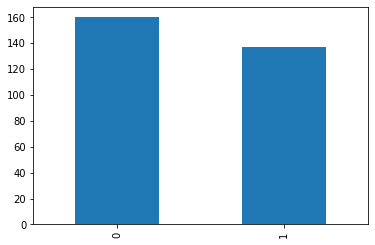

In [184]:
hrt['AHD'].value_counts().plot.bar()
plt.show()

In [185]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs')

In [187]:
# Fitting our classifier to our training data

classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
# Getting the accuracy score on our testing data

classifier.score(x_test,y_test)

0.85

In [190]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,x,y,cv=3)

In [192]:
# Printing the results
print(results)

[0.85       0.84848485 0.80612245]
